# Movies Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
# Movies Database Features used for EDA --> 'budget', 'genres',
#        'original_title', 'popularity', 'production_companies',
#        'release_date', 'revenue', 'runtime',
#        'vote_average', 'vote_count'


movies_database = pd.read_csv("movies_info.csv")
movies_database = movies_database[['budget', 'genres', 'original_title', 'popularity', 'production_companies', 
                                   'release_date', 'revenue', 'runtime', 'vote_average', 'vote_count']]
movies_database.head(2)

,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,6.9,4500


In [3]:
movies_database.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
def object_to_list(pd_df):
    x = ast.literal_eval(pd_df)
    return x 

In [5]:
# Converting type of genres and production_companies columns datatype to lists... Function used --> object_to_list()

movies_database['genres'] = movies_database['genres'].apply(object_to_list)
movies_database['production_companies'] = movies_database['production_companies'].apply(object_to_list)

In [6]:
movies_database

,budget,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Avatar,150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",2009-12-10,2787965087,162.0,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Pirates of the Caribbean: At World's End,139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",2007-05-19,961000000,169.0,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Spectre,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",2015-10-26,880674609,148.0,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",The Dark Knight Rises,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",2012-07-16,1084939099,165.0,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",John Carter,43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",2012-03-07,284139100,132.0,6.1,2124
...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",El Mariachi,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]",1992-09-04,2040920,81.0,6.6,238
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",Newlyweds,0.642552,[],2011-12-26,0,85.0,5.9,5
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Signed, Sealed, Delivered",1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...",2013-10-13,0,120.0,7.0,6
4801,0,[],Shanghai Calling,0.857008,[],2012-05-03,0,98.0,5.7,7


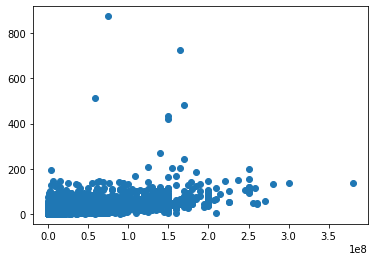

In [7]:
# Movies Budget and Popularity Overview
plt.scatter(movies_database.budget, movies_database.popularity)

# Can be plotted with Pandas too
# df.plot(kind='scatter', x='col1', y='col2', s=df.col3)

In [8]:
# Extracting the Unique Genres used in this Database
genres = set()

def extract_genres(list_of_map):
    for map_genre in list_of_map:
        genres.add(map_genre['name'])
        
for index, row in movies_database.iterrows():
    extract_genres(row['genres'])

genres = list(genres)
print(genres)

['Romance', 'Action', 'Science Fiction', 'Crime', 'Drama', 'Family', 'Western', 'TV Movie', 'Documentary', 'Animation', 'Fantasy', 'Horror', 'History', 'Thriller', 'Comedy', 'War', 'Music', 'Mystery', 'Foreign', 'Adventure']


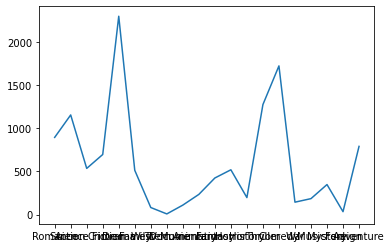

In [9]:
# Exploring the most used genres.....
def genres_movies(genre, list_of_map):
    for movie_genre_detail in list_of_map:
        if movie_genre_detail['name'] == genre:
            return True
    return False

def count_genre(dataframe, genre):
    count = 0
    for index, row in dataframe.iterrows():
        if genres_movies(genre, row['genres']):
            count+=1
    return count

# Exploring Genres and their Counts
result = {}
for genre in genres:
    result[genre] = count_genre(movies_database, genre)

plt.plot(result.keys(), result.values())

# Generating SQL Database from CSV File using Pandas 

In [10]:
import pandas as pd
import MySQLdb
import ast
import warnings

warnings.filterwarnings("ignore")

In [11]:
def object_to_list(pd_df):
    x = ast.literal_eval(pd_df)
    return x

# '[{}, {}]' --> [{}, {}]

In [12]:
db = MySQLdb.connect(host="localhost", user="root", passwd="1552454fghLPSK@$")

c = db.cursor()

c.execute("CREATE DATABASE IF NOT EXISTS moviesDb")
c.execute("USE moviesDb")

# db.close()

0

##### Creating genres_movies table (id, genre, movie)

In [13]:
c.execute("DROP TABLE IF EXISTS genres_movies") # Drop the table if already exists
# Create a table if not exists

c.execute("CREATE TABLE IF NOT EXISTS genres_movies (ID INT(255), genre VARCHAR(20), movie VARCHAR(90))")
c.execute("SHOW tables")

for x in c:
    print(x)

('genres_movies',)
('movies',)


In [14]:
# Converting specific columns movies titles and genres into specific datastructures
# Initially genres column contained strings, so string object converted to list using object_to_list() function.

df = pd.read_csv("movies_info.csv")
movies_genres = df[['original_title', 'genres']]

movies_genres['genres'] = movies_genres['genres'].apply(lambda x: object_to_list(x))
movies_genres

,original_title,genres
0,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,Pirates of the Caribbean: At World's End,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Spectre,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,The Dark Knight Rises,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,John Carter,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
...,...,...
4798,El Mariachi,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4799,Newlyweds,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
4800,"Signed, Sealed, Delivered","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4801,Shanghai Calling,[]


In [15]:
# Extracting MAX Char len of genre
# Extracting Max ID INT
# Extracting length and int possible values for Database Table schema defination

id, length = -1, -1
for index, row in movies_genres.iterrows():
#     print(row['original_title'])
#     print(row['genres'])
    for genre_object in (row['genres']):
        if genre_object['id'] > id:
            id = genre_object['id']
    for genre_object in (row['genres']):
        if len(genre_object['name']) > length:
            length = len(genre_object['name'])


# Extracting Maximum length of movie name
movie_length = -1
for movie_name in movies_genres['original_title']:
    if len(movie_name) > movie_length:
        movie_length = len(movie_name)
        
print(id, length, movie_length)

10770 15 86


In [16]:
# Creating the SQL table genres_movies in the form (ID, genre, movie_name)
for index, row in movies_genres.iterrows():
#     print(row['genres'])
#     print(row['original_title'])
    for genre in row['genres']:
#         print(genre['id'], row['original_title'])
        sql = "INSERT INTO genres_movies (id, genre, movie) VALUES (%s, %s, %s)"
        val = (genre['id'], genre['name'], row['original_title'])
        c.execute(sql, val)
        db.commit()

In [17]:
# c.execute("SELECT * from genres_movies")
# for index, row in enumerate(c):
#     print(row)
# print(index)

##### Creating companies_movies table (id, production_company, movie)

In [18]:
c.execute("DROP TABLE IF EXISTS companies_movies") # Drop the table if already exists
# Create a table if not exists

c.execute("CREATE TABLE IF NOT EXISTS companies_movies (ID INT(255), company VARCHAR(500), movie VARCHAR(90))")
c.execute("SHOW tables")

for x in c:
    print(x)

('companies_movies',)
('genres_movies',)
('movies',)


In [19]:
# Converting specific columns movies production companies and movies into specific datastructures
# Initially production_companies column contained strings, so string object converted to list using object_to_list() function.

df = pd.read_csv("movies_info.csv")
movies_companies = df[['original_title', 'production_companies']]

movies_companies['production_companies'] = movies_companies['production_companies'].apply(lambda x: object_to_list(x))
movies_companies

,original_title,production_companies
0,Avatar,"[{'name': 'Ingenious Film Partners', 'id': 289..."
1,Pirates of the Caribbean: At World's End,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
2,Spectre,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."
3,The Dark Knight Rises,"[{'name': 'Legendary Pictures', 'id': 923}, {'..."
4,John Carter,"[{'name': 'Walt Disney Pictures', 'id': 2}]"
...,...,...
4798,El Mariachi,"[{'name': 'Columbia Pictures', 'id': 5}]"
4799,Newlyweds,[]
4800,"Signed, Sealed, Delivered","[{'name': 'Front Street Pictures', 'id': 3958}..."
4801,Shanghai Calling,[]


In [20]:
# Extracting MAX Char len of production company
# Extracting Max ID INT

id, length = -1, -1
for index, row in movies_companies.iterrows():
#     print(row['original_title'])
#     print(row['production_companies'])
    for company_object in (row['production_companies']):
        if company_object['id'] > id:
            id = company_object['id']
        if len(company_object['name']) > length:
            length = len(company_object['name'])

print(id, length)

95063 77


In [21]:
# Creating the SQL table companies_movies in the form (ID, company, movie_name)
for index, row in movies_companies.iterrows():
#     print(row['production_companies'])
#     print(row['original_title'])
    for company in row['production_companies']:
        
        sql = "INSERT INTO companies_movies (id, company, movie) VALUES (%s, %s, %s)"
        val = (company['id'], company['name'], row['original_title'])
        c.execute(sql, val)
        db.commit()

In [22]:
# c.execute("SELECT * from companies_movies")
# for index, row in enumerate(c):
#     print(row)
# print(index)

##### Creating a Major Table (budget, id, popularity, release_date, revenue, runtime, original_title, vote_average, vote_count)

In [23]:
major_table = df[['id', 'original_title', 'budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_date']]
major_table

,id,original_title,budget,revenue,popularity,runtime,vote_average,vote_count,release_date
0,19995,Avatar,237000000,2787965087,150.437577,162.0,7.2,11800,2009-12-10
1,285,Pirates of the Caribbean: At World's End,300000000,961000000,139.082615,169.0,6.9,4500,2007-05-19
2,206647,Spectre,245000000,880674609,107.376788,148.0,6.3,4466,2015-10-26
3,49026,The Dark Knight Rises,250000000,1084939099,112.312950,165.0,7.6,9106,2012-07-16
4,49529,John Carter,260000000,284139100,43.926995,132.0,6.1,2124,2012-03-07
...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,220000,2040920,14.269792,81.0,6.6,238,1992-09-04
4799,72766,Newlyweds,9000,0,0.642552,85.0,5.9,5,2011-12-26
4800,231617,"Signed, Sealed, Delivered",0,0,1.444476,120.0,7.0,6,2013-10-13
4801,126186,Shanghai Calling,0,0,0.857008,98.0,5.7,7,2012-05-03


In [24]:
major_table.describe()

,id,budget,revenue,popularity,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4.803000e+03,4803.000000,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,8.226064e+07,21.492301,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,1.628571e+08,31.816650,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,0.000000e+00,4.668070,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,1.917000e+07,12.921594,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,9.291719e+07,28.313505,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,2.787965e+09,875.581305,338.000000,10.000000,13752.000000


In [25]:
print(major_table['release_date'][0])
type(major_table['release_date'][0])

2009-12-10


str

In [26]:
c.execute("DROP TABLE IF EXISTS movies") # Drop the table if already exists
# Create a table if not exists

c.execute("CREATE TABLE IF NOT EXISTS movies (id INT, movie VARCHAR(90), budget INT, revenue BIGINT, popularity FLOAT, runtime INT, vote_average INT, vote_count INT, release_date DATE)")
c.execute("SHOW tables")

for x in c:
    print(x)

('companies_movies',)
('genres_movies',)
('movies',)


In [27]:
import math
# Handling Nan values
def runtime_replace(x):
    if math.isnan(x):
        return 0
    return x

def date_replace(x):
    try:
        if math.isnan((x)):
            return 0
    except Exception as e:
        return x

major_table['runtime'] = major_table['runtime'].apply(runtime_replace)
major_table['release_date'] = major_table['release_date'].apply(date_replace)

In [28]:
# Handling Nan Values
major_table[major_table.isna().any(axis=1)]

,id,original_title,budget,revenue,popularity,runtime,vote_average,vote_count,release_date


In [29]:
# Nan Runtime value replaced by Mean of the runtime (Temp Code not to be used)
# runtime_value = int(np.average(major_table['runtime'].mean()))
# major_table['runtime'] = major_table['runtime'].fillna(runtime_value)

In [30]:
# Nan Datetime value replaced by Mean date
# Calucalting median of Dates 
# Temp code commented

# import datetime

# years = []
# days = []
# months = []

# def CreateDate(InpString):
    
#     try:
#         temp_list = InpString.split('-')
#         years.append(int(temp_list[0]))
#         months.append(int(temp_list[1]))
#         days.append(int(temp_list[2]))
        
#     except Exception as e:
#         return

# # Creating the Joining Date
# major_table['release_date'].apply(CreateDate)
# median_year = sorted(years)[(0+len(years))//2]
# median_day = sorted(days)[(0+len(days))//2]
# median_month = sorted(months)[(0+len(months))//2]

# print(median_year, median_month, median_day)
# major_table = major_table.fillna((str(median_year) + '-' + str(median_month)+'-'+str(median_day)))

In [31]:
# Temp Code commented
# import datetime
# def CreateDate(InpString):
#     return(datetime.datetime.strptime(InpString, '%Y-%m-%d'))
 
# # Creating the Joining Date
# major_table['release_date'] = major_table['release_date'].apply(CreateDate)

In [32]:
# Creating the SQL table companies_movies in the form (ID, company, movie_name)

for index, row in major_table.iterrows():
#     print(row['production_companies'])
#     print(row['original_title'])
        sql = "INSERT INTO movies (id, movie, budget, revenue, popularity, runtime, vote_average, vote_count, release_date) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
        val = (row['id'], row['original_title'], row['budget'], row['revenue'], row['popularity'], row['runtime'], row['vote_average'], row['vote_count'], row['release_date'])
        c.execute(sql, val)
        db.commit()

In [33]:
# c.execute("SELECT * from movies")
# for index, row in enumerate(c):
#     print(row)
# print(index)

# Final Tables

In [34]:
c.execute("Show Tables")

for rows in c:
    print(rows)

('companies_movies',)
('genres_movies',)
('movies',)


In [35]:
db.close()

# Solving Questions

In [36]:
import MySQLdb

class DbStreamer:

    @staticmethod
    def get_rows(data):
        data_rows = []
        for row in data:
            data_rows.append(row)
        return data_rows


    def __init__(self, host, user, password, database):
        self.conn = MySQLdb.Connection(host=host,
                                       user=user,
                                       passwd=password,
                                       db=database,
                                       charset="utf8",
                                       use_unicode=True)
        _cursor = self.conn.cursor()
        return

    def get_connection(self):
        return self.conn

    def close_connection(self):
        self.conn.commit()
        self.conn.close()
        return
    
    def get_tables(self):
        sql = "SHOW TABLES;"
        
        _cursor = self.conn.cursor()
        _cursor.execute(sql)
        data = _cursor.fetchall()

        return data

    def q0(self):
        sql = "SELECT DATE('2020-01-23');"
        _cursor = self.conn.cursor()
        _cursor.execute(sql)
        data = _cursor.fetchall()
        return data

    # TODO: Add your logic for each of the questions in the corresponding methods provided below. Each method should return a list of tuples/rows without the header.
    def q1(self):
        _cursor = self.conn.cursor()
        
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        data = []
        _cursor.execute("SELECT id FROM movies ORDER BY movies.vote_count DESC LIMIT 5")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q2(self):
        _cursor = self.conn.cursor()
        
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        data = []
        _cursor.execute("SELECT id FROM movies ORDER BY movies.budget DESC LIMIT 1")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q3(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("SELECT movie, runtime from movies where (runtime = (select max(runtime) from movies)) OR (runtime = (select min(runtime) from movies where runtime > 0) ) LIMIT 2")
        for row in _cursor:
            data.append(row)
        
        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q4(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
#         _cursor.execute("SELECT movie, release_date from movies where (release_date = (select min(release_date) from movies)) OR (release_date = (select max(release_date) from movies)) LIMIT 2")
        _cursor.execute('select id , release_date from movies where (release_date = (select Max(release_date) from movies)) OR (release_date = (select Min(release_date) from movies where release_date > 0) ) order by release_date ASC limit 2;')    
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q5(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("select movie as movies_name, budget from movies where (popularity = (select Max(popularity) from movies))")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q6(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("select id from companies_movies where (movie = (select movie from movies where popularity = (select Max(popularity) from movies)))")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q7(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
#         _cursor.execute("Select Count(*) from companies_movies HAVING COUNT(SELECT count(*) as NUM FROM companies_movies GROUP BY movie HAVING NUM > 2)>2")
        _cursor.execute("SELECT count(*) as NUM FROM companies_movies GROUP BY movie HAVING NUM > 2")    
        for row in _cursor:
            data.append(row)
        
        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return len(data)+1
    
    def q8(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
#         _cursor.execute("Select movie from (Select * from movies where (revenue = select MIN(revenue) from (select * from movies ORDER BY budget)))")
        _cursor.execute("Select movie from ( select movie, (budget-revenue) as substraction from movies ) as child ORDER BY substraction DESC LIMIT 1")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q9(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
#         _cursor.execute("Select * from ( SELECT movie, genre, count(*) as NUM FROM genres_movies GROUP BY movie ) as child ORDER BY NUM DESC")
        _cursor.execute("Select movie, genre from genres_movies where movie = (Select movie from ( SELECT movie, genre, count(*) as NUM FROM genres_movies GROUP BY movie ) as child ORDER BY NUM DESC LIMIT 1)")
       
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q10(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
#         _cursor.execute("Select id from companies_movies where movie = (Select movie from ( SELECT movie, id, count(*) as NUM FROM companies_movies GROUP BY company ) as child ORDER BY NUM DESC LIMIT 1)")
        _cursor.execute("Select x.id from (select p.id, count(m.movie) as Total from movies as m, companies_movies as p where m.movie = p.movie group by p.id order by Total DESC limit 4 ) as x LIMIT 1")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q15(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("select m.movie, g.genre from movies as m, genres_movies as g where g.movie = m.movie  Order by budget DESC limit 20")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q11(self):
        _cursor = self.conn.cursor()

        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        data = []
#         _cursor.execute("Select m.movie, c.company from (Select * from movies ORDER BY vote_count DESC)  as m, companies_movies as c where c.movie = m.movie GROUP BY c.company")
        _cursor.execute("select distinct company from companies_movies as p , movies as m where m.movie = p.movie order by vote_count desc limit 19")
        for row in _cursor:
            data.append(row)
            
        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data
    
    def q14(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("select genre, AVG(vote_count) from movies as m , genres_movies as g where m.movie = g.movie group by genre")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data   
            
    def q12(self):
        _cursor = self.conn.cursor()
        data = []
        # TODO: Add logic here
        # ------------------------------------------------------------------------------------
        _cursor.execute("select distinct cm.id from companies_movies as cm where cm.id not in ( select distinct(p.id) from movies as m, companies_movies as p where m.movie = p.movie and vote_average < 7 )")
        for row in _cursor:
            data.append(row)

        # ------------------------------------------------------------------------------------
        # Do not edit below this line, otherwise the autograder won't be able to evaluate your code.

        return data

In [37]:
if __name__ == "__main__":
    ## ToDO: Init the DbStreamer object
    db_streamer = DbStreamer('localhost', 'root', '1552454fghLPSK@$', 'moviesDb')
#     print(db_streamer.q0()) Done
#     print(db_streamer.q1()) Done
#     print(db_streamer.q2()) Done
#     print(db_streamer.q3()) Done
#     print(db_streamer.q4()) Done
#     print(db_streamer.q5()) Done
#     print(db_streamer.q6()) Done
#     print(db_streamer.q7()) Done
#     print(db_streamer.q8()) Done
#     print(db_streamer.q9()) Done
#     print(db_streamer.q10()) Done
#     print(db_streamer.q11()) Done
#     print(db_streamer.q12()) Done
#     print(db_streamer.q13())
#     print(db_streamer.q14()) Done
#     print(db_streamer.q15()) Done